<a href="https://colab.research.google.com/github/SeriousSkvorch/Colab_jupyter22_58/blob/main/%D0%9B%D0%B0%D0%B1_2_23_%D0%92%D0%9C%D0%B7_%D0%A1%D0%BA%D0%B2%D0%BE%D1%80%D1%86%D0%BE%D0%B2_%D0%90%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1 #
## Предваритеьлная обработка данных ##
**Цель лабораторной работы** - получение навыков работы с библиотеками анализа данных, средствами визуализации.

### Вариант 1. Titanic. ###
1. Определите количество мужчин и женщин, которые ехали на корабле.
2. Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.
3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
4. Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.
5. Коррелируют ли число братьев/сестёр с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.
6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имён, а также разделения их на женские и мужские.
7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких граафиках.
9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы.
10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.


In [12]:
import pandas as pd
titanic_df = pd.read_csv('titanic.csv')

In [ ]:
# 1. Количество мужчин и женщин, которые ехали на корабле
print(titanic_df.groupby(['Sex'])['PassengerId'].count())

Sex
female    314
male      577
Name: PassengerId, dtype: int64


In [ ]:
# 2. Определить какой части пассажиров удалось выжить.
# Посчитайте долю выживших пассажиров
AllPass = titanic_df['PassengerId'].count()
Survivors = titanic_df[(titanic_df['Survived'] == 1)]['PassengerId'].count()
print(f"Всего пассажиров - {AllPass}")
print(f"Выжившие - {Survivors}")
print(f"Доля выживших - {(Survivors/AllPass):.3f} ({(100*(Survivors/AllPass)):.3f}%)")

Всего пассажиров - 891
Выжившие - 342
Доля выживших - 0.384 (38.384%)


In [ ]:
# 3. Какую долю пассажиры первого класса составляли среди всех пассажиров?
FirstClass = titanic_df[(titanic_df['Pclass'] == 1)]['PassengerId'].count()
print(f"Всего пассажиров - {AllPass}")
print(f"Пассажиров первого класса - {FirstClass}")
print(f"Доля выживших- {(FirstClass/AllPass):.3f} ({(100*(FirstClass/AllPass)):.3f}%)")

Всего пассажиров - 891
Пассажиров первого класса - 216
Доля выживших- 0.242 (24.242%)


In [ ]:
# 4. Какого возраста были пассажиры?
# Посчитайте среднее и медиану возраста пассажиров
AvgAge = titanic_df['Age'].mean()
MedAge = titanic_df['Age'].median()
print(f"Средний возраст пассажиров - {AvgAge}")
print(f"Медианный возраст пассажиров - {MedAge}")


Средний возраст пассажиров - 29.69911764705882
Медианный возраст пассажиров - 28.0


Корреляция Пирсона между SibSp и Parch - 0.4148
P-value - 0.2242 * 10^-37
Корреляция является статистически значимой.


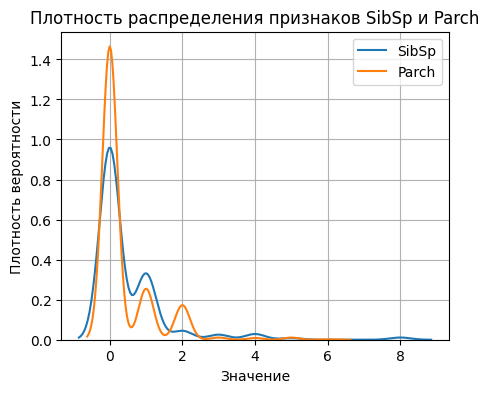

In [66]:
# 5. Коррелируют ли число братьев/сестёр с числом родителей/детей?
# Посчитайте корреляцию Пирсона между признаками SibSp и Parch.
# Оцените значение p-value. Постройте плотность распределения
# признаков SibSp и Parch.
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

correlation, p_value = stats.pearsonr(titanic_df['SibSp'], titanic_df['Parch'])
print(f"Корреляция Пирсона между SibSp и Parch - {correlation:.4f}")
print(f"P-value - {(p_value*(10**37)):.4f} * 10^-37")
if p_value < 0.05:
  print("Корреляция является статистически значимой.")
else:
  print("Корреляция не является статистически значимой.")

plt.figure(figsize=(5, 4))

sns.kdeplot(data=titanic_df, x='SibSp', fill=False, label='SibSp')
sns.kdeplot(data=titanic_df, x='Parch', fill=False, label='Parch')

plt.title('Плотность распределения признаков SibSp и Parch')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# 6. Какое самое популярное женское имя на корабле?
# Извлеките из полного пассажира (колонка Name) его личное имя (First Name).
# Попробуйте вручную разобрать несколько значений столбца Name и выработать
# правило для извлечения имён, а также разделения их на женские и мужские.
from collections import Counter

def get_first_name(name):
  fName = name.split(',')[1]
  if "Miss" in fName:
    return fName.split(' ')[2]
  else:
    if len(fName.split('(')) == 1:
      return fName.split(' ')[1]
    else:
      return fName.split('(')[1].split(' ')[0]

AllFem = titanic_df[(titanic_df['Sex'] == 'female')]['PassengerId'].count()
first_names = titanic_df[(titanic_df['Sex'] == 'female')]['Name'].apply(get_first_name)
titanic_df['First_Name'] = first_names

print(f"Всего женщин на корабле - {AllFem}")
print(f"Различных имен - {len(Counter(first_names).most_common())}")
print(f"Самое популярное имя: {Counter(first_names).most_common()[0][0]}, встречается {Counter(first_names).most_common()[0][1]} раз")

#titanic_df[titanic_df['First_Name'].notna()]


Всего женщин на корабле - 314
Различных имен - 184
Самое популярное имя: Anna, встречается 14 раз


In [90]:
# 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
titanic_df.head()
correlation, p_value = stats.pearsonr(titanic_df['Survived'], titanic_df['Pclass'])
print(f"Корреляция Пирсона - {correlation:.4f}")
print(f"P-value - {(p_value*(10**25)):.4f} * 10^-25")
if p_value < 0.05:
  print("Корреляция класса пассажира с выживаемостью является статистически значимой.")
else:
  print("Корреляция класса пассажира с выживаемостью не является статистически значимой.")

Корреляция Пирсона - -0.3385
P-value - 2.5370 * 10^-25
Корреляция класса пассажира с выживаемостью является статистически значимой.


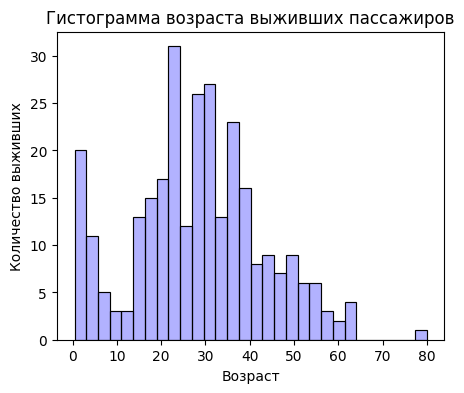

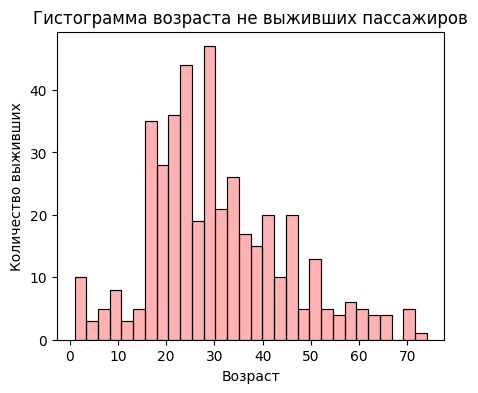

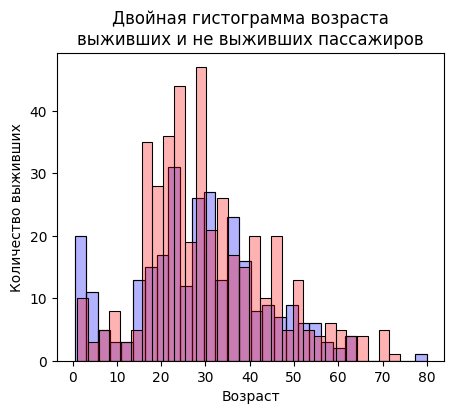

In [130]:
# 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров.
# Сделайте выводы. Отобразите данные на одном и нескольких граафиках.
SurvivedAge = titanic_df[(titanic_df['Survived'] == 1)]['Age']
NotSurvivedAge = titanic_df[(titanic_df['Survived'] == 0)]['Age']

plt.figure(figsize=(5,4))
sns.histplot(SurvivedAge, bins=30, color = 'blue', alpha = 0.3)
plt.title('Гистограмма возраста выживших пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(NotSurvivedAge, bins=30, color = 'red', alpha = 0.3)
plt.title('Гистограмма возраста не выживших пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')
plt.show()

plt.figure(figsize=(5,4))
sns.histplot(SurvivedAge, bins=30, color = 'blue', alpha = 0.3)
sns.histplot(NotSurvivedAge, bins=30, color = 'red', alpha = 0.3)
plt.title('Двойная гистограмма возраста\nвыживших и не выживших пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество выживших')
plt.show()



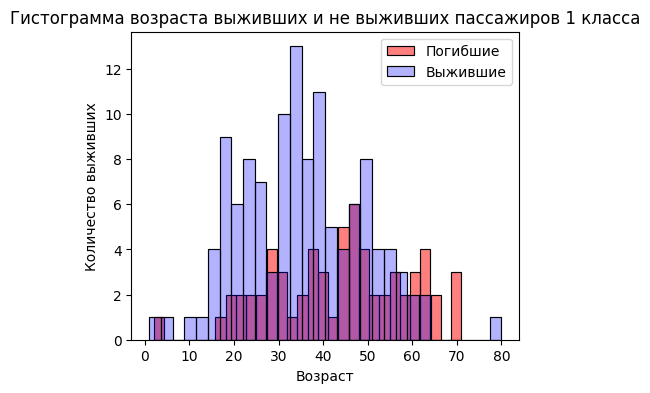

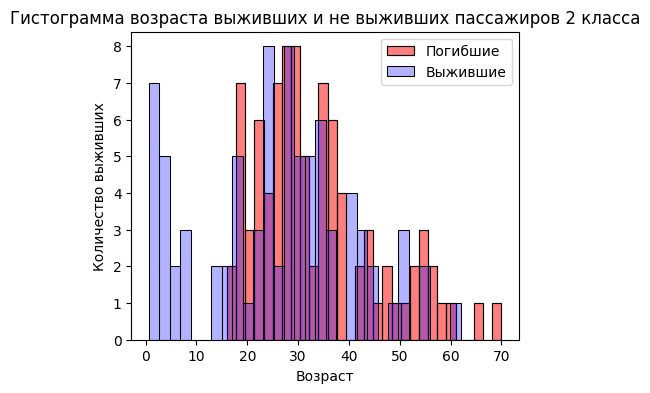

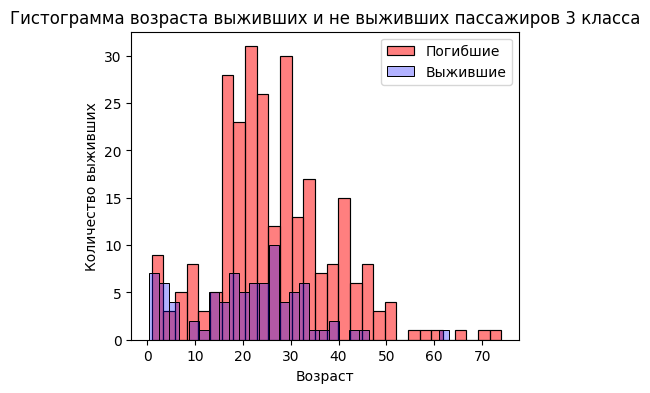

In [169]:
# 9. Визуализируйте гистограммы возраста для выживших и не выживших
# пассажиров по классам. Сделайте выводы.
def showHist(Pclass):
  plt.figure(figsize=(5,4))
  sns.histplot(titanic_df[(titanic_df['Pclass'] == Pclass) & (titanic_df['Survived'] == 0)]['Age'], bins=30, color = 'red', alpha = 0.5, label = "Погибшие")
  sns.histplot(titanic_df[(titanic_df['Pclass'] == Pclass) & (titanic_df['Survived'] == 1)]['Age'], bins=30, color = 'blue', alpha = 0.3, label = "Выжившие")
  plt.title(f'Гистограмма возраста выживших и не выживших пассажиров {Pclass} класса')
  plt.xlabel('Возраст')
  plt.ylabel('Количество выживших')
  plt.legend()
  plt.show()

showHist(1)
showHist(2)
showHist(3)

### Вывод: ###
Исходя из гистограмм, количество выживших пассажиров зависит от класса.
Большинство пассажиров 3 класса погибли, большинство пассажиров 1 класса выжили, а у пассажиров 2 класса количество погибших и выживших примерно равно.

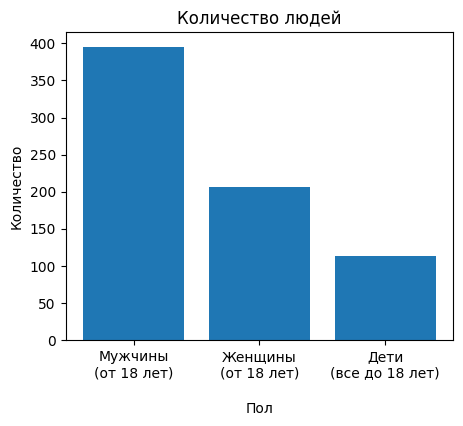

In [191]:
# 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.
man = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] >= 18)]['PassengerId'].count()
woman = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Age'] >= 18)]['PassengerId'].count()
child = titanic_df[(titanic_df['Age'] < 18)]['PassengerId'].count()

titles = ['Мужчины\n(от 18 лет)', 'Женщины\n(от 18 лет)', 'Дети\n(все до 18 лет)']
counts = [man, woman, child]

plt.figure(figsize=(5, 4))
plt.bar(titles, counts)
plt.title('Количество людей')
plt.xlabel('\nПол')
plt.ylabel('Количество')
plt.show()
